<a href="https://colab.research.google.com/github/MohdHassan7721/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Clustering
Approach to Solving the Problem

Load the Dataset:
Import the customer data from the provided CSV file.
Preprocess the Data:
Handle missing values, if any.
Normalize numerical features (e.g., average credit limit, total visits) to ensure all features have equal weight.
Determine Optimal Clusters:
Use the Elbow Method to identify the optimal number of clusters (K).
Apply K-Means Clustering:
Perform clustering on the processed data using the identified number of clusters.
Evaluate Clustering:
Compute inertia (tightness of clusters) and silhouette score (quality of separation between clusters).
Analyze and Visualize Clusters:
Analyze the characteristics of each cluster.
Visualize clusters using PCA for dimensionality reduction.

##Step 1: Import Required Libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


##Step 2: Load the Dataset
Explanation:

* Reads the CSV file into a Pandas DataFrame

* Keeps the function reusable for different datasets

In [ ]:
# Load dataset
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    return data


##Step 3: Data Preprocessing
Explanation:

* Feature Selection: Chosen variables reflect customer behavior.

* Missing Values: Replaced using mean to avoid data loss.

* Scaling: Ensures all features contribute equally to distance calculations.

In [ ]:
# Preprocess data
def preprocess_data(data):
    features = data[['Avg_Credit_Limit',
                      'Total_Credit_Cards',
                      'Total_visits_bank',
                      'Total_visits_online',
                      'Total_calls_made']]
    # Handle missing values
    features = features.fillna(features.mean())

    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)

    return scaled_data, features


##Step 4: Determine the Optimal Number of Clusters.
Metrics Used

**1.** Elbow Method (Inertia)

* Measures within-cluster variance

* Lower inertia = tighter clusters

**2.** Silhouette Score

* Measures how well points fit within their cluster

* Range: -1 to +1

* Higher score = better separation

In [ ]:
import matplotlib.pyplot as plt

# Determine optimal clusters
def determine_optimal_clusters(data):
    inertia = []
    silhouette_scores = []
    K = range(2, 8)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot Elbow Curve
    plt.figure()
    plt.plot(K, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # Plot Silhouette Score
    plt.figure()
    plt.plot(K, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.show()

    return K, inertia, silhouette_scores

##Visualization


In [ ]:
# The plotting code has been moved to the `determine_optimal_clusters` function.

##Step 5: Apply K-Means Clustering
Explanation:

* Assigns each customer to a cluster

* random_state ensures reproducibility

In [ ]:
# Apply K-Means clustering
def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

##Step 6: Visualize Customer Segments using PCA.
Explanation:

* PCA preserves maximum variance

* Helps visually validate cluster separation

In [ ]:
# Visualize clusters
def visualize_clusters(data, labels, n_clusters):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    plt.figure()
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'Customer Segments (K = {n_clusters})')
    plt.show()

##Step 7: Analyze Cluster Characteristics.
Explanation:

* Calculates average behavior per cluster

* Helps identify:

  * High-value customers

  * Digitally active users

  * Bank-branch-dependent customers

In [ ]:
# Display cluster statistics
def display_cluster_statistics(original_data, labels, n_clusters):
    original_data['Cluster'] = labels
    print("\nCluster Characteristics:\n")
    print(original_data.groupby('Cluster').mean())

##Step 8: Main Execution Flow
* Final Outcome:

  * Customers segmented into distinct behavioral groups

  * Optimal cluster count validated using Elbow + Silhouette

  * Results visualized and interpreted for business decision-making

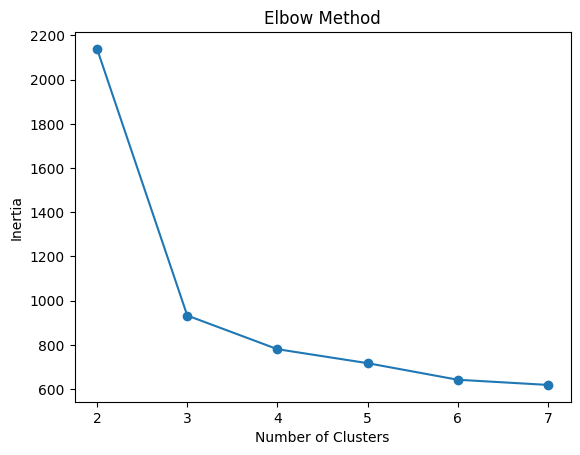

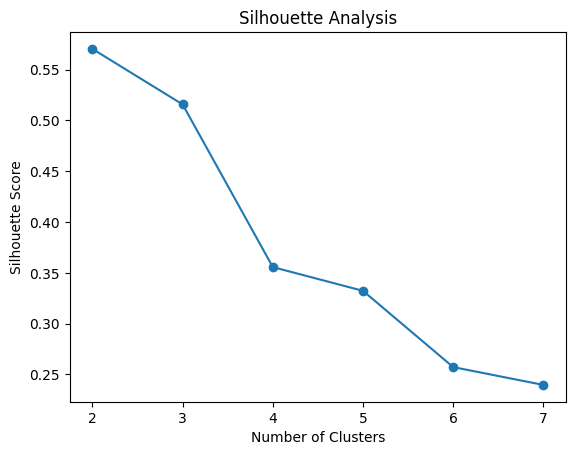

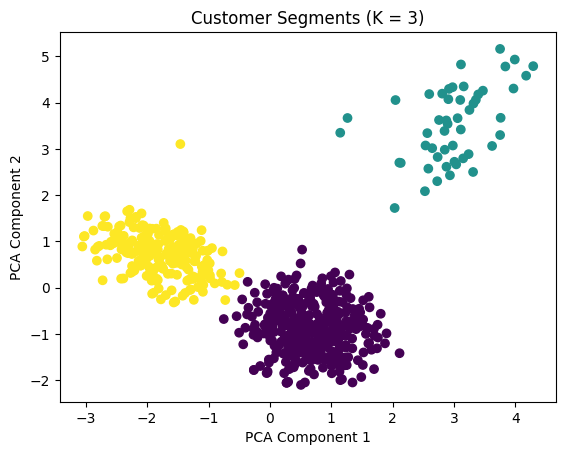


Cluster Characteristics:

         Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0            33782.383420            5.515544           3.489637   
1           141040.000000            8.740000           0.600000   
2            12174.107143            2.410714           0.933036   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   0.981865          2.000000  
1                  10.900000          1.080000  
2                   3.553571          6.870536  


In [ ]:
# Main function
def main():
    file_path = 'credit_card_customers.csv'  # update path if needed

    data = load_dataset(file_path)
    scaled_data, original_features = preprocess_data(data)

    determine_optimal_clusters(scaled_data)

    # Choose optimal K (usually 3 based on business case)
    n_clusters = 3
    labels = apply_kmeans(scaled_data, n_clusters)

    visualize_clusters(scaled_data, labels, n_clusters)
    display_cluster_statistics(original_features, labels, n_clusters)

if __name__ == "__main__":
    main()